<a href="https://colab.research.google.com/github/ashrafulwork/TrafficVisionBD/blob/analyze%2Ftesting/TrafficVisionBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First we need to setup our envrionment before we even start training our model

In [ ]:
!nvidia-smi

Sat Nov  9 10:28:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Installing kaggle

In [ ]:
!pip install kaggle

Uploading kaggle.json file ( make sure to upload your own json file)

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdashrafulhossain","key":"acc5ad91a973f1b6ab7b3cfd1f6eff38"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Here we passed the dataset path/link

In [ ]:
!kaggle datasets download -d hasibzunair/rsud20k-bangladesh-road-scene-understanding # Replace 'datasetname' with your dataset's identifier


Dataset URL: https://www.kaggle.com/datasets/hasibzunair/rsud20k-bangladesh-road-scene-understanding
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 10.2G/10.2G [08:57<00:00, 18.8MB/s]
100% 10.2G/10.2G [08:57<00:00, 20.4MB/s]


The dataset is now uploaded as a ZIP file. Now we need to upload/extract the zip file

In [ ]:
import zipfile
import os

# Assuming the dataset is in a single zip file, e.g., 'datasetname.zip'
with zipfile.ZipFile("rsud20k-bangladesh-road-scene-understanding.zip", 'r') as zip_ref:
    zip_ref.extractall("path/to/extract")  # Replace with your preferred directory


Now let us see some samples of our dataset

Found 20334 images belonging to 2 classes.


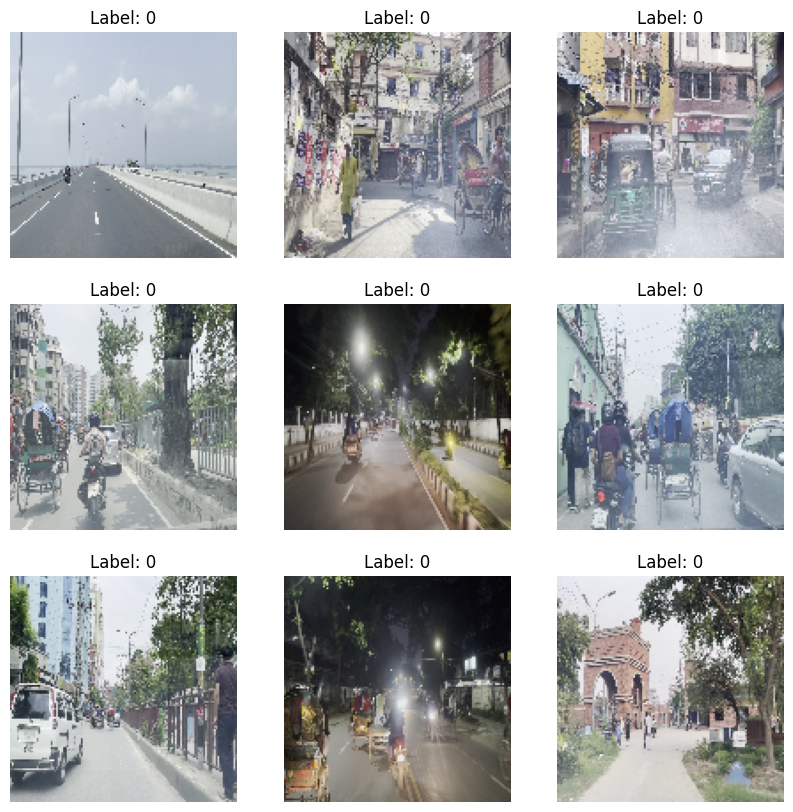

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Set up ImageDataGenerator to load images with labels
data_dir = '/content/path/to/extract/rsud20k'  # Replace with the path where images are extracted

# Load images directly from the directory
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)
data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),  # Resize images to 128x128 (adjust as needed)
    batch_size=32,
    class_mode='binary'  # Change to 'categorical' if you have more than 2 classes
)

# Display a batch of images
def show_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {int(labels[i])}")
        plt.axis("off")
    plt.show()

# Get a batch of images and labels
images, labels = next(data)
show_images(images, labels)


In [ ]:
!pip install yolov10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 6.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=98f49293046e10abb3693274cab21b5d591bbf98113a59b94a39e35fd0eb26da
  Stored in dire

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov10n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.59M/5.59M [00:00<00:00, 252MB/s]


In [ ]:
results = model(source = "/content/path/to/extract/rsud20k/images/train/train0.jpg", show =True, conf =0.4, save = True)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/path/to/extract/rsud20k/images/train/train0.jpg: 384x640 2 persons, 2 bicycles, 1 car, 156.6ms
Speed: 3.4ms preprocess, 156.6ms inference, 117.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


In [ ]:
import os
print(os.path.exists("/content/image.png"))


False


In [ ]:
#checking maximum number of class

In [ ]:
import os

label_dir = '/content/path/to/extract/rsud20k/labels/train'  # Path to your label directory
classes_count = 13  # Total number of classes

# Function to fix the labels
def fix_labels(label_file):
    with open(label_file, 'r') as file:
        lines = file.readlines()

    corrected_lines = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        if class_id >= classes_count:  # If class ID is greater than 12, we correct it
            print(f"Correcting label {line.strip()} in {label_file}")
            class_id = class_id % classes_count  # Assign a valid class ID
        corrected_line = f"{class_id} " + " ".join(parts[1:])
        corrected_lines.append(corrected_line)

    with open(label_file, 'w') as file:
        file.writelines([line + '\n' for line in corrected_lines])

# Iterate over label files and fix them
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        fix_labels(os.path.join(label_dir, label_file))


In [ ]:
import os

image_dir = '/content/path/to/extract/rsud20k/images/train'
label_dir = '/content/path/to/extract/rsud20k/labels/train'

# Check for missing or empty label files
missing_labels = []
empty_labels = []

for image_file in os.listdir(image_dir):
    if image_file.endswith('.jpg'):  # assuming your images are in JPG format
        label_file = image_file.replace('.jpg', '.txt')
        label_path = os.path.join(label_dir, label_file)

        if not os.path.exists(label_path):
            missing_labels.append(label_file)
        else:
            with open(label_path, 'r') as file:
                if len(file.readlines()) == 0:  # Empty label file
                    empty_labels.append(label_file)

print("Missing label files:", missing_labels)
print("Empty label files:", empty_labels)


Missing label files: []
Empty label files: []


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov10n.pt')



In [ ]:
!yolo task=detect mode=train model="/content/yolov10n.pt" data="/content/data.yaml" epochs=10 imgsz=640


Streaming output truncated to the last 5000 lines.
train: WARNING ⚠️ /content/path/to/extract/rsud20k/images/train/train6096.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/path/to/extract/rsud20k/images/train/train6097.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/path/to/extract/rsud20k/images/train/train6098.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/path/to/extract/rsud20k/images/train/train6099.jpg: ignoring corrupt image/label: Label class 9 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/path/to/extract/rsud20k/images/train/train61.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/pat

In [ ]:
results = model(source = "/content/path/to/extract/rsud20k/images/train/train1003.jpg", show =True, conf =0.4, save = True)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/path/to/extract/rsud20k/images/train/train1003.jpg: 384x640 3 persons, 1 car, 47.3ms
Speed: 2.6ms preprocess, 47.3ms inference, 29.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3


In [ ]:
dataset = "/content/path/to/extract/rsud20k/images/train"

In [ ]:
!yolo predict model="/content/yolov8n.pt" source = "/content/image.png"

100% 6.25M/6.25M [00:00<00:00, 328MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/image.png: 448x640 15 cars, 4 buss, 2 trucks, 60.6ms
Speed: 3.5ms preprocess, 60.6ms inference, 1161.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=segment mode=predict model="/content/yolov8n-seg.pt" source = "/content/path/to/extract/rsud20k/images/train/train10015.jpg"

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,404,320 parameters, 0 gradients, 12.6 GFLOPs

image 1/1 /content/path/to/extract/rsud20k/images/train/train10015.jpg: 384x640 2 persons, 1 car, 1 motorcycle, 5 buss, 58.6ms
Speed: 2.9ms preprocess, 58.6ms inference, 556.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from google.colab import files

# Path to the trained model (best model or last model)
model_path = '/content/runs/detect/train11/weights/best.pt'  # or use 'last.pt' if you prefer

# Download the model
files.download(model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo task=segment mode=predict model="/content/yolov8n-seg.pt" source = "/content/HHHHGG.mp4"

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,404,320 parameters, 0 gradients, 12.6 GFLOPs

video 1/1 (frame 1/2234) /content/HHHHGG.mp4: 384x640 1 car, 90.4ms
video 1/1 (frame 2/2234) /content/HHHHGG.mp4: 384x640 1 car, 10.3ms
video 1/1 (frame 3/2234) /content/HHHHGG.mp4: 384x640 1 car, 9.7ms
video 1/1 (frame 4/2234) /content/HHHHGG.mp4: 384x640 1 person, 1 car, 12.6ms
video 1/1 (frame 5/2234) /content/HHHHGG.mp4: 384x640 1 person, 1 car, 10.1ms
video 1/1 (frame 6/2234) /content/HHHHGG.mp4: 384x640 1 car, 9.9ms
video 1/1 (frame 7/2234) /content/HHHHGG.mp4: 384x640 1 car, 10.0ms
video 1/1 (frame 8/2234) /content/HHHHGG.mp4: 384x640 1 car, 10.0ms
video 1/1 (frame 9/2234) /content/HHHHGG.mp4: 384x640 1 car, 10.0ms
video 1/1 (frame 10/2234) /content/HHHHGG.mp4: 384x640 1 car, 13.0ms
video 1/1 (frame 11/2234) /content/HHHHGG.mp4: 384x640 1 car, 11.5ms
video 1/1 (frame 12/2234) /content/HHHHGG.mp4: 384x640 2 cars

In [ ]:
from google.colab import files

# Path to the video file you want to download
video_path = '/content/runs/segment/predict6/HHHHGG.avi'

# Download the video file
files.download(video_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo predict model="/content/yolov8n.pt" source = "/content/HHHHGG.mp4"

In [ ]:
!pip freeze > requirements.txt